In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('winequality-white.csv', sep=';')

# Display the first few rows of the dataframe
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## EDA

In [16]:
# Checking the structure and data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [17]:
# Checking for missing values
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [18]:
# Summary statistics
print(df.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

Outliers: The maximum values for 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', and 'chlorides' are much higher than their 75th percentile values. This indicates potential outliers that we should investigate further. We could use boxplots or histograms to visualize these potential outliers.
python
Copy code
#


<function matplotlib.pyplot.show(close=None, block=None)>

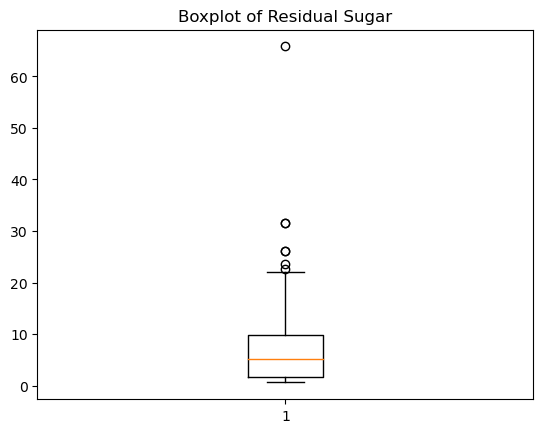

In [19]:
# Boxplot for residual sugar
plt.boxplot(df['residual sugar'])
plt.title('Boxplot of Residual Sugar')
plt.show


2. Distribution of 'quality': The mean and median (50%) of 'quality' are both around 6. We can explore the distribution further to understand if there's a class imbalance problem, which could affect our model's performance.

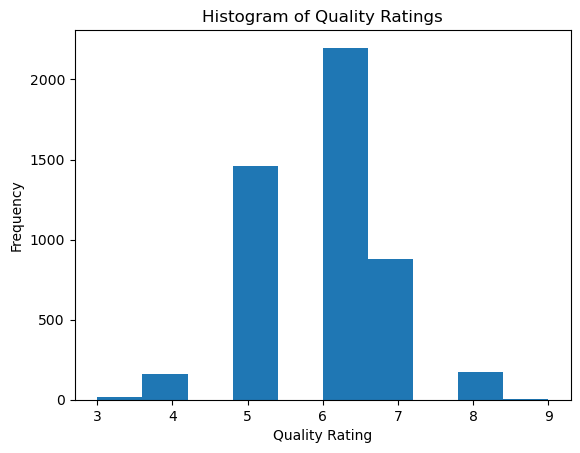

In [20]:
# Histogram for quality
plt.hist(df['quality'], bins=10)
plt.title('Histogram of Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Frequency')
plt.show()


In [21]:
# Correlation Matrix
corr_matrix = df.corr()
print(corr_matrix['quality'])


fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64


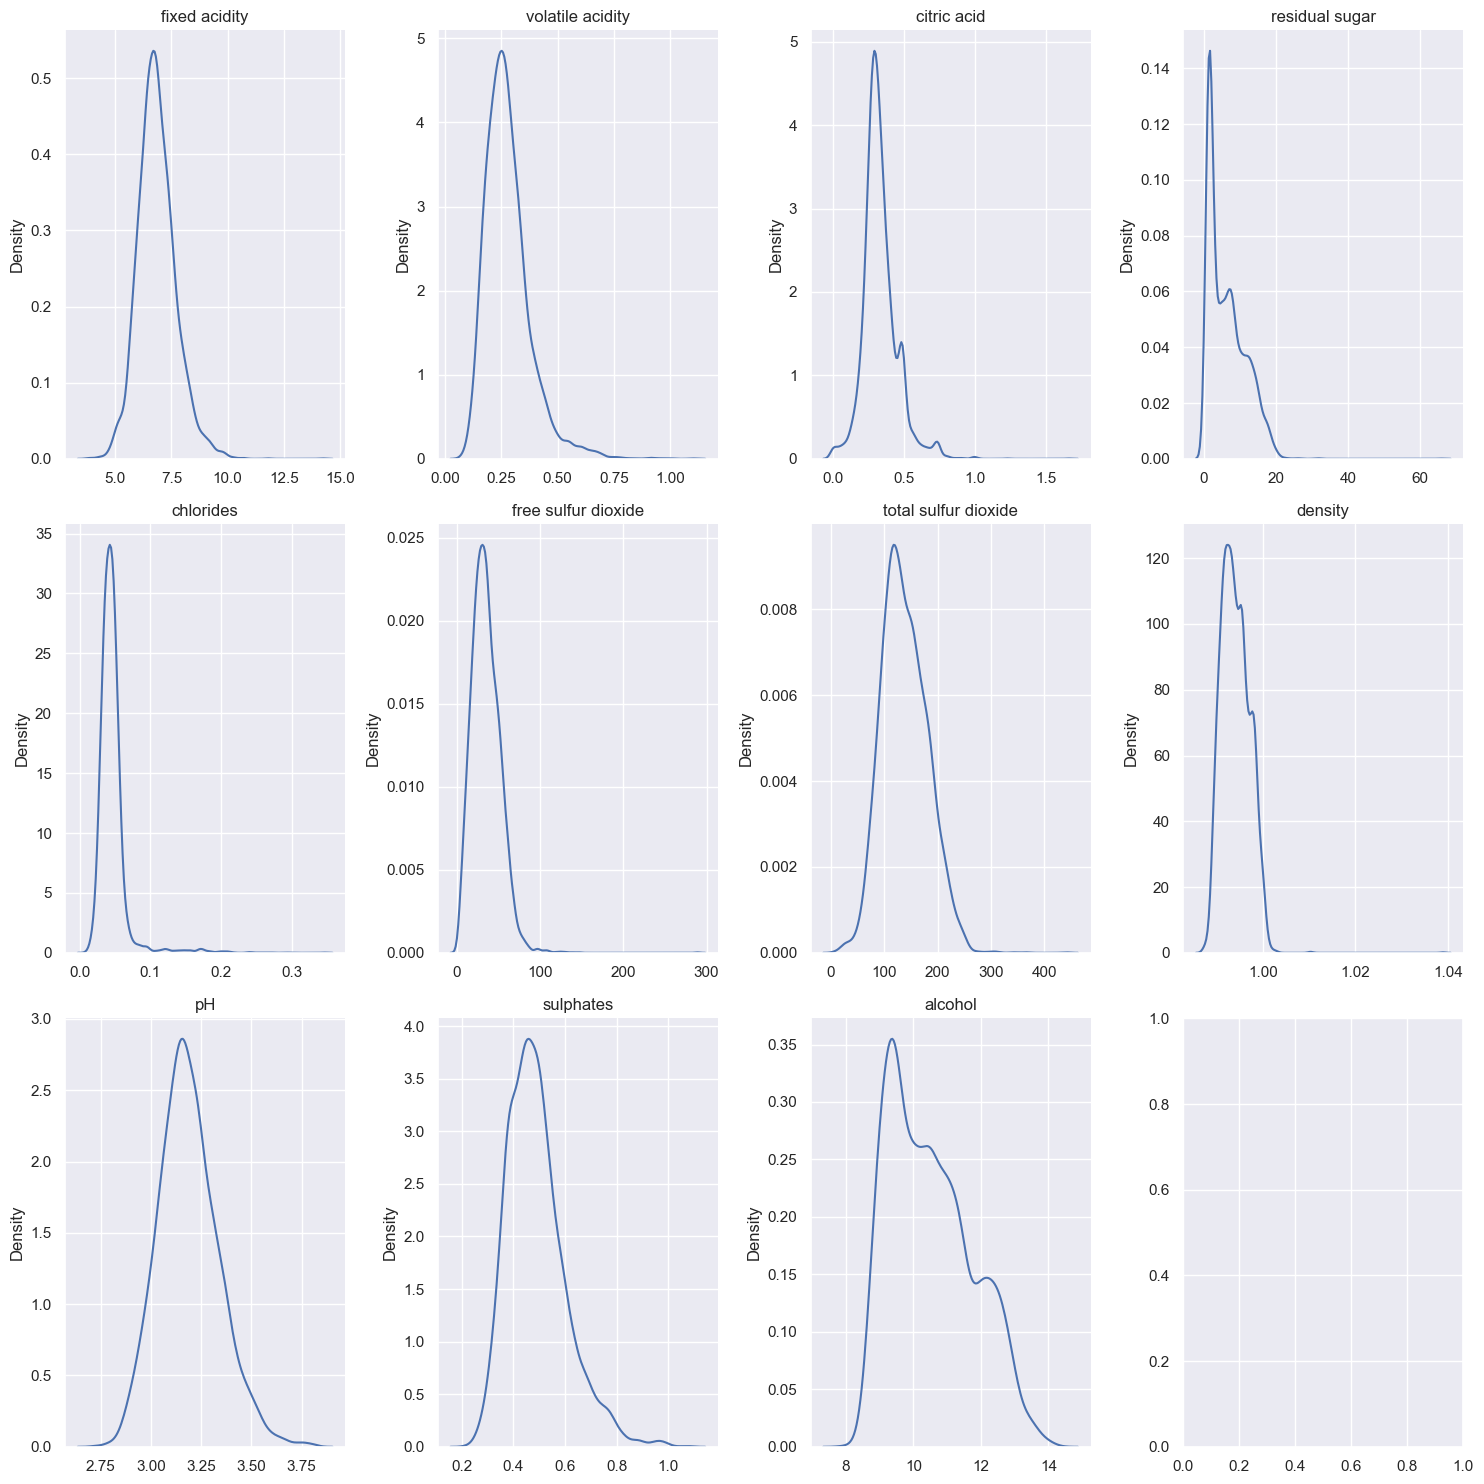

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Calculate the number of rows and columns based on the total number of features
num_features = len(selected_features)
num_rows = int(num_features ** 0.5)
num_cols = (num_features + num_rows - 1) // num_rows

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate over the selected features and plot each KDE plot on a different subplot
for i, feature in enumerate(selected_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    sns.kdeplot(data=df, x=feature, ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('Density')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plt.tight_layout()
plt.show()

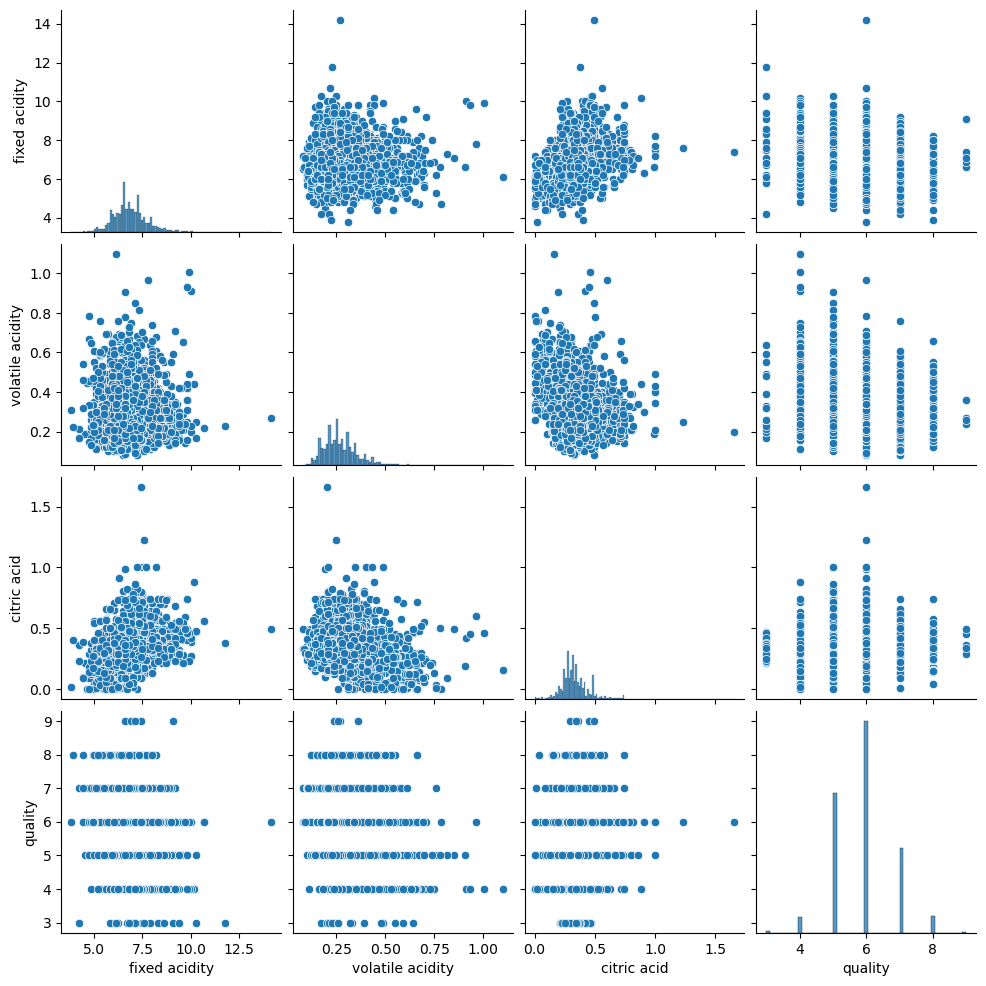

In [22]:
# Pairplot of few selected features
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'quality']
sns.pairplot(df[selected_features])
plt.show()


In [6]:
# # # Assume that you have no missing data and outliers
# # # Feature engineering would depend on the specific dataset and problem
# # # For this, let's just scale the data and split it

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # # Assuming 'quality' is the target variable
# X = df.drop('quality', axis=1)
# y = df['quality']

# # # Scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Splitting the dataset
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)



## 

In [7]:

# # # Assuming that 'features' is the list of feature names
# features = list(df.columns)[:-1]  # replace with your actual column names, excluding 'quality'

# # # Convert numpy arrays back to pandas DataFrame
# X_train_df = pd.DataFrame(X_train, columns=features)
# y_train_df = pd.DataFrame(y_train, columns=['quality'])

# # # Save to csv files
# X_train_df.to_csv('X_train.csv', index=False)
# y_train_df.to_csv('y_train.csv', index=False)

# # # Repeat the same for X_test and y_test
# X_test_df = pd.DataFrame(X_test, columns=features)
# y_test_df = pd.DataFrame(y_test, columns=['quality'])

# X_test_df.to_csv('X_test.csv', index=False)
# y_test_df.to_csv('y_test.csv', index=False)
